   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 562M/562M [00:03<00:00, 183MB/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 116s 32ms/step - accuracy: 0.6967 - loss: 1.0360 - val_accuracy: 0.8435 - val_loss: 0.4652
Epoch 2/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 113s 32ms/step - accuracy: 0.8577 - loss: 0.4117 - val_accuracy: 0.8618 - val_loss: 0.4054
Epoch 3/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 136s 30ms/step - accuracy: 0.8762 - loss: 0.3397 - val_accuracy: 0.8686 - val_loss: 0.3795
Epoch 4/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.8881 - loss: 0.2972 - val_accuracy: 0.8724 - val_loss: 0.3757
Epoch 5/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 0.9000 - loss: 0.2628 - val_accuracy: 0.8714 - val_loss: 0.3864
Epoch 6/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 141s 30ms/step - accuracy: 0.9073 - loss: 0.2369 - val_accuracy: 0.8698 - val_loss: 0.3867
Epoch 7/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9139 - loss: 0.2170 - val_accuracy: 0.8739 - val_loss: 0.4003
Epoch 8/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 

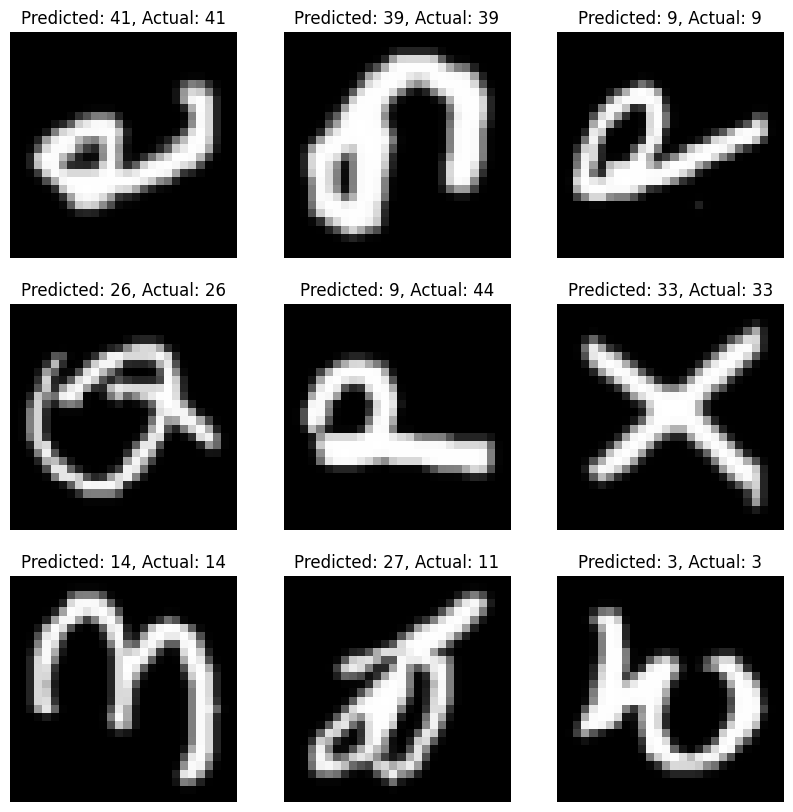

In [ ]:
# Install required libraries
!pip install torch torchvision tensorflow numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download and load the EMNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.EMNIST(root="./data", split="balanced", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.EMNIST(root="./data", split="balanced", train=False, download=True, transform=transform)

# Convert PyTorch tensors to NumPy arrays for TensorFlow
train_images = train_dataset.data.numpy().astype("float32") / 255.0
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy().astype("float32") / 255.0
test_labels = test_dataset.targets.numpy()

# Reshape images to (28, 28, 1) for TensorFlow
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(47, activation='softmax')  # EMNIST has 47 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Function to predict a single image
def predict_image(image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    return np.argmax(prediction)

# Display some test samples
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predict_image(test_images[i])}, Actual: {test_labels[i]}")
    plt.axis('off')
plt.show()
